In [1]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

In [3]:
emails = pd.read_csv("datasets/emails.csv")

In [4]:
emails.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
emails = emails.iloc[:,1:]

In [6]:
emails.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [7]:
X = emails.iloc[:,:-1]
y = emails.iloc[:, -1]

In [8]:
emails.nunique()

the           90
to            72
ect           90
and           53
for           42
              ..
military       4
allowing       3
ff            23
dry            4
Prediction     2
Length: 3001, dtype: int64

In [9]:
y.sum()

1500

In [10]:
y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [11]:
emails.isnull().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

/tmp/ipykernel_40016/988377163.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(emails.Prediction)


<Axes: xlabel='Prediction', ylabel='Density'>

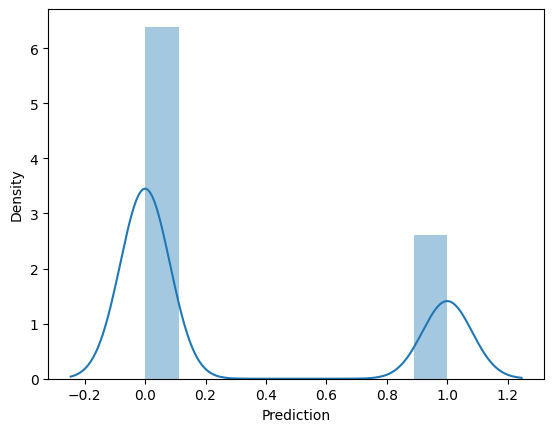

In [12]:
sns.distplot(emails.Prediction)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [85]:
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [14]:
def perform(y_test, y_pred):
    TP = 0
    TN =0
    FP=0
    FN=0
    for index, i in enumerate(y_test):
        if (y_pred[index] == 1):
            if (y_pred[index] == i):
                TP+= 1
            else:
                FP += 1
        else:
            if (y_pred[index] == i):
                TN += 1
            else:
                FN += 1
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    print("Precision :", TP / (TP + FP))
    print("Recall :", TP / (TP + FN))
    print("Accuracy Score :", (TP + TN) / (TP+TN+FP+FN))
    print("F1 Score :", (2 * precision * recall) / (precision + recall))
    print("\n", np.array([[TP, FN],[FP,TN]]))
    print("")
    cm_display = ConfusionMatrixDisplay(confusion_matrix = np.array([[TP, FN],[FP,TN]]), display_labels=['Spam', 'Not Spam'] )
    cm_display.plot()
    plt.show()

        
            

In [15]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [16]:
y_pred_gnb = model_gnb.predict(X_test)

Precision : 0.9079497907949791
Recall : 0.9559471365638766
Accuracy Score : 0.9587628865979382
F1 Score : 0.9313304721030043

 [[ 434   20]
 [  44 1054]]



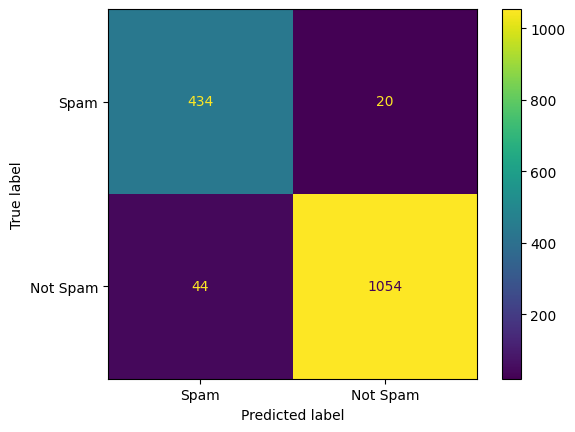

In [17]:
perform(y_test, y_pred_gnb)

In [18]:
model_mnb = MultinomialNB()
model_mnb.fit(X_train, y_train)

MultinomialNB()

In [19]:
y_pred_mnb = model_mnb.predict(X_test)

Precision : 0.8732394366197183
Recall : 0.9559471365638766
Accuracy Score : 0.946520618556701
F1 Score : 0.9127234490010515

 [[ 434   20]
 [  63 1035]]



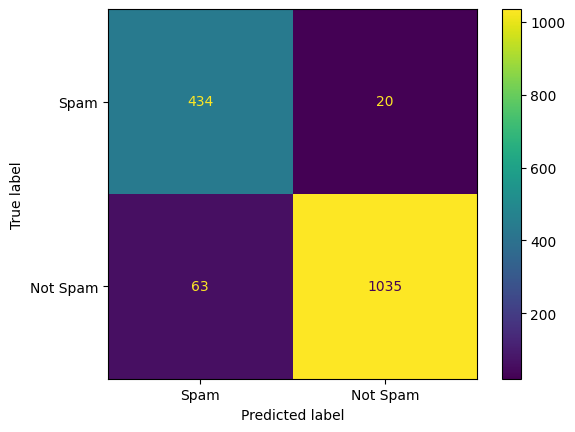

In [20]:
perform(y_test, y_pred_mnb)

In [21]:
model_bnb = BernoulliNB()
model_bnb.fit(X_train, y_train)

BernoulliNB()

In [22]:
y_pred_bnb = model_bnb.predict(X_test)

Precision : 0.7920353982300885
Recall : 0.788546255506608
Accuracy Score : 0.8775773195876289
F1 Score : 0.7902869757174393

 [[ 358   96]
 [  94 1004]]



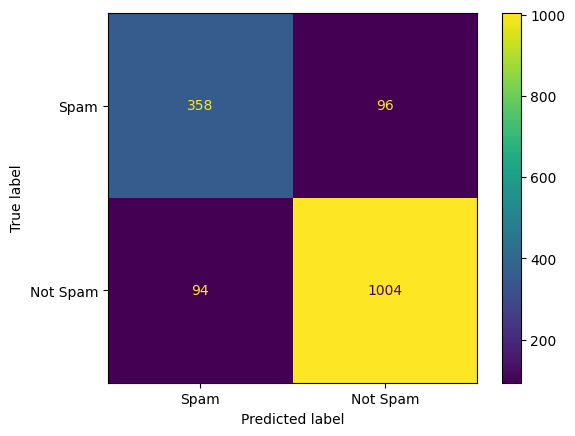

In [23]:
perform(y_test, y_pred_bnb)

In [24]:
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [25]:
y_pred_xg = model_xg.predict(X_test)

Precision : 0.960352422907489
Recall : 0.960352422907489
Accuracy Score : 0.9768041237113402
F1 Score : 0.960352422907489

 [[ 436   18]
 [  18 1080]]



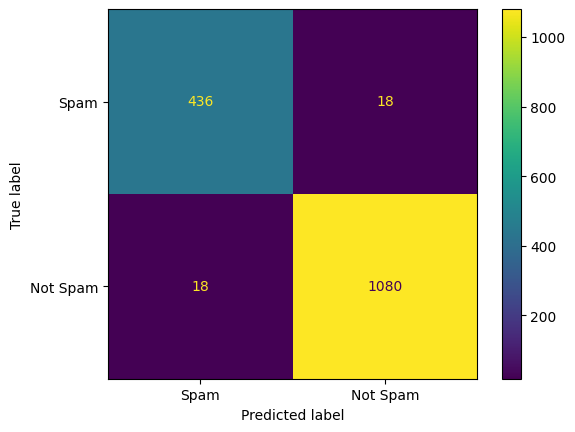

In [26]:
perform(y_test, y_pred_xg)

In [27]:
model_lr = LogisticRegression()

In [28]:
model_lr.fit(X_train, y_train)

/home/kaustubhg73/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred_lr = model_lr.predict(X_test)

Precision : 0.9358407079646017
Recall : 0.9317180616740088
Accuracy Score : 0.961340206185567
F1 Score : 0.9337748344370861

 [[ 423   31]
 [  29 1069]]



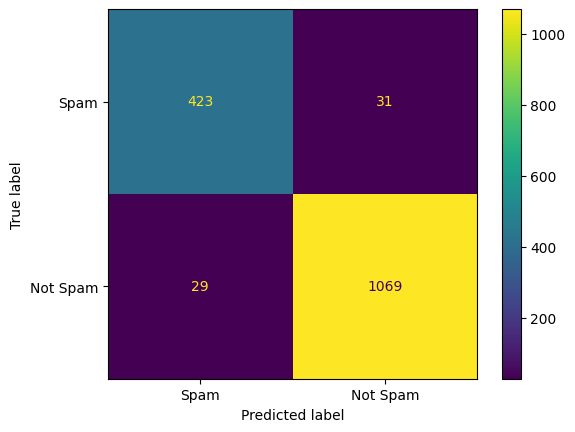

In [30]:
perform(y_test, y_pred_lr)

In [31]:
model_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [32]:
y_pred_dt = model_dt.predict(X_test)

Precision : 0.9020979020979021
Recall : 0.8524229074889867
Accuracy Score : 0.9297680412371134
F1 Score : 0.8765571913929784

 [[ 387   67]
 [  42 1056]]



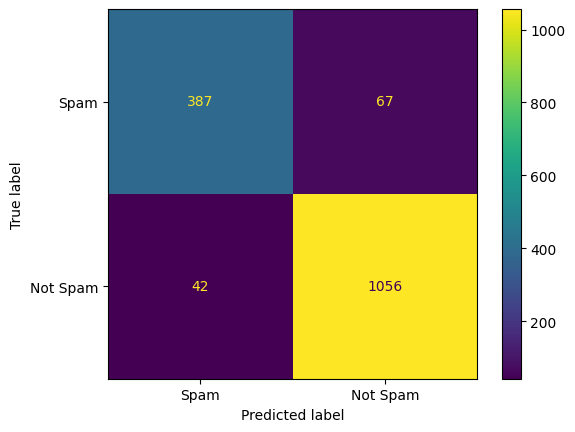

In [33]:
perform(y_test, y_pred_dt)

In [34]:
model_rf = RandomForestClassifier(n_estimators=10, criterion='entropy')
model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [35]:
y_pred_rf = model_rf.predict(X_test)

Precision : 0.9606879606879607
Recall : 0.8612334801762115
Accuracy Score : 0.9490979381443299
F1 Score : 0.9082462253193961

 [[ 391   63]
 [  16 1082]]



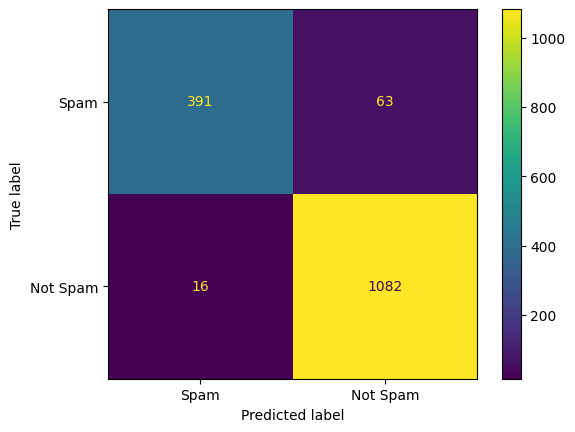

In [36]:
perform(y_test, y_pred_rf)

In [37]:
model_svm = SVC(kernel='linear', random_state=0)
model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [38]:
y_pred_svm = model_svm.predict(X_test)

Precision : 0.9106753812636166
Recall : 0.920704845814978
Accuracy Score : 0.9503865979381443
F1 Score : 0.9156626506024096

 [[ 418   36]
 [  41 1057]]



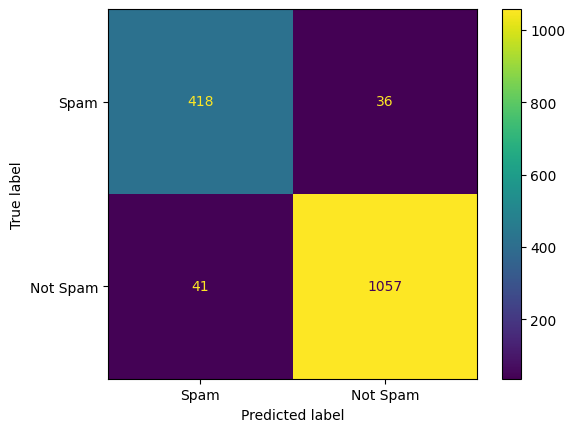

In [39]:
perform(y_test, y_pred_svm)

In [40]:
model_knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree')
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=8)

In [41]:
y_pred_knn = model_knn.predict(X_test)

Precision : 0.7785087719298246
Recall : 0.7819383259911894
Accuracy Score : 0.8711340206185567
F1 Score : 0.7802197802197802

 [[355  99]
 [101 997]]



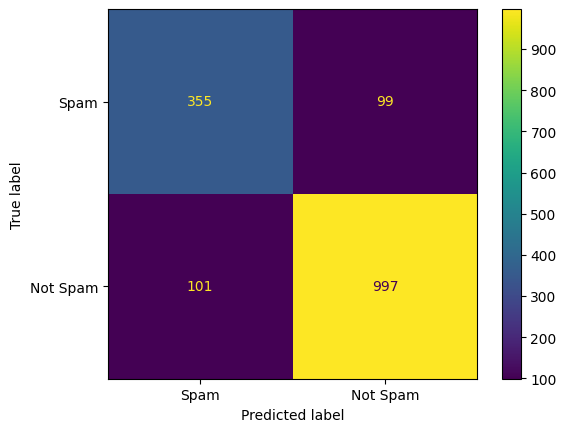

In [42]:
perform(y_test, y_pred_knn)

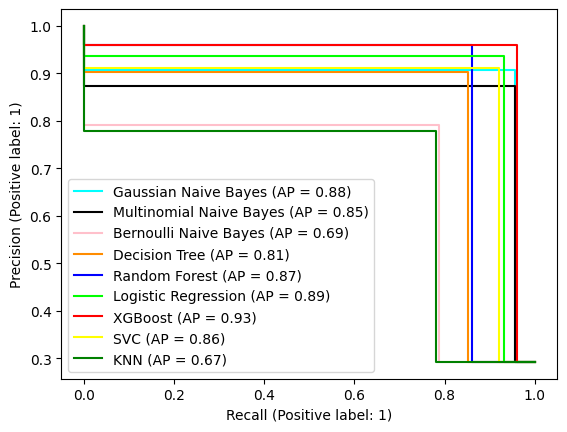

In [43]:
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_predictions(y_test, y_pred_gnb, name=f"Gaussian Naive Bayes", color="cyan", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_mnb, name=f"Multinomial Naive Bayes", color="black", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_bnb, name=f"Bernoulli Naive Bayes", color="pink", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_dt, name=f"Decision Tree", color="darkorange", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf, name=f"Random Forest", color="blue", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_lr, name=f"Logistic Regression", color="lime", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_xg, name=f"XGBoost", color="red", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_svm, name=f"SVC", color="yellow", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_knn, name=f"KNN", color="green", ax=ax)

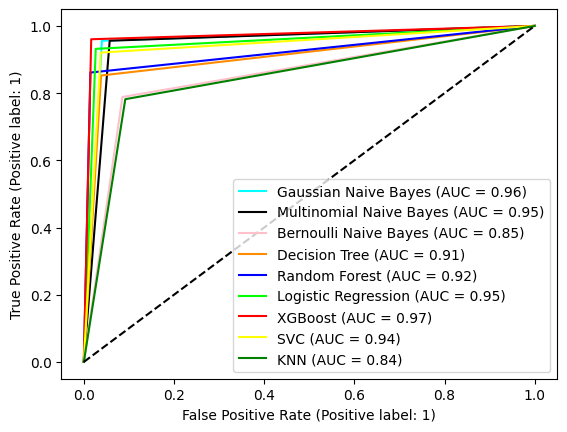

In [62]:
fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(y_test, y_pred_gnb, name=f"Gaussian Naive Bayes", color="cyan", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_mnb, name=f"Multinomial Naive Bayes", color="black", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_bnb, name=f"Bernoulli Naive Bayes", color="pink", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_dt, name=f"Decision Tree", color="darkorange", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_rf, name=f"Random Forest", color="blue", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_lr, name=f"Logistic Regression", color="lime", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_xg, name=f"XGBoost", color="red", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_svm, name=f"SVC", color="yellow", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_pred_knn, name=f"KNN", color="green", ax=ax)
plt.plot([0, 1], [0, 1], color="black", linestyle="--")

In [115]:
def tokenize_text(text):
    punctuation = ['.', ',', ';', ':', '!', '?', '-', '(', ')', '[', ']', '{', '}', '"','/']
    text = text.strip().lower().replace('\n','')
    tokens = []
    current_token = ''
    
    for char in text:
        if char not in punctuation and char != ' ':
            current_token += char
        elif current_token != '':
            tokens.append(current_token)
            current_token = ''
    
    # Add the last token if it exists
    if current_token != '':
        tokens.append(current_token)

    return tokens

def create_dataframe(email_token):
    X_new = {}
    for i in X.columns:
        X_new[i] = email_token.count(i)
    X_new = pd.Series(X_new)
    column_names = X.columns
    X_token = pd.DataFrame(columns=column_names)
    X_token.loc[len(X_token)] = X_new
    return X_token


In [118]:
email = """introducing
doctor - formulated
hgh
human growth hormone - also called hgh
is referred to in medical science as the master hormone . it is very plentiful
when we are young , but near the age of twenty - one our bodies begin to produce
less of it . by the time we are forty nearly everyone is deficient in hgh ,
and at eighty our production has normally diminished at least 90 - 95 % .
advantages of hgh :
- increased muscle strength
- loss in body fat
- increased bone density
- lower blood pressure
- quickens wound healing
- reduces cellulite
- improved vision
- wrinkle disappearance
- increased skin thickness texture
- increased energy levels
- improved sleep and emotional stability
- improved memory and mental alertness
- increased sexual potency
- resistance to common illness
- strengthened heart muscle
- controlled cholesterol
- controlled mood swings
- new hair growth and color restore
read
more at this website
unsubscribe

"""
email_x = tokenize_text(email)
X_token = create_dataframe(email_x)

In [120]:
y_pred = model_xg.predict(X_token)
y_pred


1

In [122]:
email = input("Give us an email to check:")
y_pred = model_xg.predict(create_dataframe(tokenize_text(email)))
if (y_pred[0] == 0):
    print("Email not spam")
else:
    print("Email is spam")

Give us an email to check: banned cd ! government don ' t want me to sell it . see now * indirect obvious roebuck soma cornfield crane wattage ir collier stork brunt transcendental leathery burnside heighten planoconvex coordinate juju marlborough proposal allot janos artifice sturbridge darlene break tremulous arbitrage conjugacy catalogue casework auditor capillary diffractometer millionth osteopath honeymoon prexy jed haggle pang subtlety eight dominick harmon earsplitting extrude arcadia glutamate memphis frescoes cave psychoacoustic cashmere nubile diffusive binary


Email is spam
